### Import

In [1]:
import pandas as pd
import numpy as np
import sys
import glob
import seaborn as sns
%matplotlib inline

In [2]:
sys.path.insert(0, '../code/')

In [3]:
from loading_routines import *
from preprocessing import *
from feature_engineering import *
from mov_ampl import *
import speed_feature
import split_tasks
import sensor_features
import sensor_data

### Load data

In [4]:
all_files = glob.glob('../data/behavior_AND_personality_dataset/joints/*.xml')
#print all_files
all_files_new = glob.glob('../data/data_recordings_master/joints/*.xml')

In [5]:
all_sensor_files = glob.glob('../data/behavior_AND_personality_dataset/binary/*.txt')
all_sensor_files_new = glob.glob('../data/data_recordings_master/binary/*.txt')

In [6]:
# remove for now
all_files = [f for f in all_files if not 'subject3' in f]
all_files_new = [f for f in all_files_new if not 'subject21' in f]
all_sensor_files = [f for f in all_sensor_files if not 'subject3' in f]
all_sensor_files_new = [f for f in all_sensor_files_new if not 'subject21' in f]

In [7]:
all_subjects_dfs = [load_df_from_xml(f) for f in all_files+all_files_new]

Loaded 0 tracks for "subject6"
Loaded 1000 tracks for "subject6"
Loaded 2000 tracks for "subject6"
Loaded 3000 tracks for "subject6"
Loaded 4000 tracks for "subject6"
Loaded 5000 tracks for "subject6"
Loaded 6000 tracks for "subject6"
Loaded 7000 tracks for "subject6"
Loaded 8000 tracks for "subject6"
Loaded 9000 tracks for "subject6"
Loaded 10000 tracks for "subject6"
Loaded 11000 tracks for "subject6"
Loaded 12000 tracks for "subject6"
Loaded 13000 tracks for "subject6"
Loaded 14000 tracks for "subject6"
Loaded 15000 tracks for "subject6"
Loaded 16000 tracks for "subject6"
Loaded 17000 tracks for "subject6"
Loaded 18000 tracks for "subject6"
Loaded 19000 tracks for "subject6"
Loaded 20000 tracks for "subject6"
Loaded 21000 tracks for "subject6"
Loaded 22000 tracks for "subject6"
Loaded 23000 tracks for "subject6"
Loaded 24000 tracks for "subject6"
Loaded 25000 tracks for "subject6"
Loaded 26000 tracks for "subject6"
Loaded 27000 tracks for "subject6"
Loaded 0 tracks for "subject11"
L

Loaded 0 tracks for "subject15"
Loaded 1000 tracks for "subject15"
Loaded 2000 tracks for "subject15"
Loaded 3000 tracks for "subject15"
Loaded 4000 tracks for "subject15"
Loaded 5000 tracks for "subject15"
Loaded 6000 tracks for "subject15"
Loaded 7000 tracks for "subject15"
Loaded 8000 tracks for "subject15"
Loaded 9000 tracks for "subject15"
Loaded 10000 tracks for "subject15"
Loaded 11000 tracks for "subject15"
Loaded 12000 tracks for "subject15"
Loaded 13000 tracks for "subject15"
Loaded 14000 tracks for "subject15"
Loaded 15000 tracks for "subject15"
Loaded 16000 tracks for "subject15"
Loaded 17000 tracks for "subject15"
Loaded 18000 tracks for "subject15"
Loaded 19000 tracks for "subject15"
Loaded 20000 tracks for "subject15"
Loaded 21000 tracks for "subject15"
Loaded 22000 tracks for "subject15"
Loaded 23000 tracks for "subject15"
Loaded 24000 tracks for "subject15"
Loaded 0 tracks for "subject16"
Loaded 1000 tracks for "subject16"
Loaded 2000 tracks for "subject16"
Loaded 3000

Loaded 0 tracks for "subject5"
Loaded 1000 tracks for "subject5"
Loaded 2000 tracks for "subject5"
Loaded 3000 tracks for "subject5"
Loaded 4000 tracks for "subject5"
Loaded 5000 tracks for "subject5"
Loaded 6000 tracks for "subject5"
Loaded 7000 tracks for "subject5"
Loaded 8000 tracks for "subject5"
Loaded 9000 tracks for "subject5"
Loaded 10000 tracks for "subject5"
Loaded 11000 tracks for "subject5"
Loaded 12000 tracks for "subject5"
Loaded 13000 tracks for "subject5"
Loaded 14000 tracks for "subject5"
Loaded 15000 tracks for "subject5"
Loaded 16000 tracks for "subject5"
Loaded 17000 tracks for "subject5"
Loaded 18000 tracks for "subject5"
Loaded 19000 tracks for "subject5"
Loaded 20000 tracks for "subject5"
Loaded 21000 tracks for "subject5"
Loaded 22000 tracks for "subject5"
Loaded 23000 tracks for "subject5"
Loaded 0 tracks for "subject18"
Loaded 1000 tracks for "subject18"
Loaded 2000 tracks for "subject18"
Loaded 3000 tracks for "subject18"
Loaded 4000 tracks for "subject18"
L

Loaded 18000 tracks for "subject26"
Loaded 19000 tracks for "subject26"
Loaded 20000 tracks for "subject26"
Loaded 21000 tracks for "subject26"
Loaded 22000 tracks for "subject26"
Loaded 23000 tracks for "subject26"
Loaded 24000 tracks for "subject26"
Loaded 25000 tracks for "subject26"
Loaded 26000 tracks for "subject26"
Loaded 27000 tracks for "subject26"
Loaded 28000 tracks for "subject26"
Loaded 29000 tracks for "subject26"
Loaded 30000 tracks for "subject26"
Loaded 31000 tracks for "subject26"
Loaded 32000 tracks for "subject26"
Loaded 33000 tracks for "subject26"
Loaded 34000 tracks for "subject26"
Loaded 35000 tracks for "subject26"
Loaded 36000 tracks for "subject26"
Loaded 37000 tracks for "subject26"
Loaded 38000 tracks for "subject26"
Loaded 39000 tracks for "subject26"
Loaded 40000 tracks for "subject26"
Loaded 41000 tracks for "subject26"
Loaded 42000 tracks for "subject26"
Loaded 43000 tracks for "subject26"
Loaded 44000 tracks for "subject26"
Loaded 45000 tracks for "sub

Loaded 31000 tracks for "subject33"
Loaded 32000 tracks for "subject33"
Loaded 33000 tracks for "subject33"
Loaded 34000 tracks for "subject33"
Loaded 35000 tracks for "subject33"
Loaded 36000 tracks for "subject33"
Loaded 37000 tracks for "subject33"
Loaded 38000 tracks for "subject33"
Loaded 39000 tracks for "subject33"
Loaded 40000 tracks for "subject33"
Loaded 41000 tracks for "subject33"
Loaded 42000 tracks for "subject33"
Loaded 43000 tracks for "subject33"
Loaded 44000 tracks for "subject33"
Loaded 45000 tracks for "subject33"
Loaded 46000 tracks for "subject33"
Loaded 47000 tracks for "subject33"
Loaded 48000 tracks for "subject33"
Loaded 49000 tracks for "subject33"
Loaded 50000 tracks for "subject33"
Loaded 51000 tracks for "subject33"
Loaded 0 tracks for "subject37"
Loaded 1000 tracks for "subject37"
Loaded 2000 tracks for "subject37"
Loaded 3000 tracks for "subject37"
Loaded 4000 tracks for "subject37"
Loaded 5000 tracks for "subject37"
Loaded 6000 tracks for "subject37"
Lo

Loaded 35000 tracks for "subject27"
Loaded 36000 tracks for "subject27"
Loaded 37000 tracks for "subject27"
Loaded 38000 tracks for "subject27"
Loaded 39000 tracks for "subject27"
Loaded 40000 tracks for "subject27"
Loaded 41000 tracks for "subject27"
Loaded 42000 tracks for "subject27"
Loaded 43000 tracks for "subject27"
Loaded 44000 tracks for "subject27"
Loaded 45000 tracks for "subject27"
Loaded 46000 tracks for "subject27"
Loaded 47000 tracks for "subject27"
Loaded 0 tracks for "subject30"
Loaded 1000 tracks for "subject30"
Loaded 2000 tracks for "subject30"
Loaded 3000 tracks for "subject30"
Loaded 4000 tracks for "subject30"
Loaded 5000 tracks for "subject30"
Loaded 6000 tracks for "subject30"
Loaded 7000 tracks for "subject30"
Loaded 8000 tracks for "subject30"
Loaded 9000 tracks for "subject30"
Loaded 10000 tracks for "subject30"
Loaded 11000 tracks for "subject30"
Loaded 12000 tracks for "subject30"
Loaded 13000 tracks for "subject30"
Loaded 14000 tracks for "subject30"
Loade

Loaded 20000 tracks for "subject42"
Loaded 21000 tracks for "subject42"
Loaded 22000 tracks for "subject42"
Loaded 23000 tracks for "subject42"
Loaded 24000 tracks for "subject42"
Loaded 25000 tracks for "subject42"
Loaded 26000 tracks for "subject42"
Loaded 27000 tracks for "subject42"
Loaded 0 tracks for "subject29"
Loaded 1000 tracks for "subject29"
Loaded 2000 tracks for "subject29"
Loaded 3000 tracks for "subject29"
Loaded 4000 tracks for "subject29"
Loaded 5000 tracks for "subject29"
Loaded 6000 tracks for "subject29"
Loaded 7000 tracks for "subject29"
Loaded 8000 tracks for "subject29"
Loaded 9000 tracks for "subject29"
Loaded 10000 tracks for "subject29"
Loaded 11000 tracks for "subject29"
Loaded 12000 tracks for "subject29"
Loaded 13000 tracks for "subject29"
Loaded 14000 tracks for "subject29"
Loaded 15000 tracks for "subject29"
Loaded 16000 tracks for "subject29"
Loaded 17000 tracks for "subject29"
Loaded 18000 tracks for "subject29"
Loaded 19000 tracks for "subject29"
Loade

In [8]:
all_subjects_dfs[0].head()

,subject,frameId,time,trackingId,head_x,head_y,head_z,neck_x,neck_y,neck_z,...,hipL_z,kneeL_x,kneeL_y,kneeL_z,ankleL_x,ankleL_y,ankleL_z,footL_x,footL_y,footL_z
0,subject6,931,Wed Oct 19 15:55:22 2016,72057594037947129,414.735733,218.653477,1.820866,427.427867,242.727138,1.784373,...,1.852995,378.771600,335.347754,1.678975,351.898800,375.952062,1.797402,370.870667,375.645538,1.812354
1,subject6,932,Wed Oct 19 15:55:22 2016,72057594037947129,413.872200,218.814708,1.820161,426.217600,242.888185,1.783911,...,1.852989,372.505933,337.140308,1.675867,345.665400,374.151508,1.792908,366.841800,372.444062,1.806464
2,subject6,933,Wed Oct 19 15:55:22 2016,72057594037947129,410.977400,219.107631,1.820441,423.093200,243.090031,1.786230,...,1.900480,370.081200,344.954277,1.680725,342.561333,378.250954,1.803415,365.215267,372.247323,1.808235
3,subject6,934,Wed Oct 19 15:55:22 2016,72057594037947129,408.856200,219.520985,1.819258,419.666667,243.542523,1.788762,...,1.931537,401.453533,285.447323,1.696043,373.310000,350.075631,1.808638,377.069467,371.144062,1.693703
4,subject6,935,Wed Oct 19 15:55:22 2016,72057594037947129,405.528867,219.517354,1.820305,416.802600,243.772246,1.792717,...,1.928871,399.905600,287.162338,1.697487,373.446400,352.511015,1.803372,380.323067,373.448000,1.689126


### Task separation

In [9]:
all_df_per_per_per_task = []
for all_frames_df in all_subjects_dfs:
    subject = all_frames_df['subject'][0]
    path_to_sensor = [f for f in all_sensor_files+all_sensor_files_new if subject+'.txt' in f]
    #print len(path_to_sensor)
    per_person_per_task = split_tasks.split_tasks(all_frames_df, subject, path_to_sensor[0])
    all_df_per_per_per_task.append(per_person_per_task)

## Preprocessing

#### Remove outliers and normalize on task basis

In [10]:
#dfs_prep = [remove_outliers(df, low_percentil=0.03, high_percentil=0.97) for df in all_subjects_dfs]
dfs_prep = [] #holds all dfs per person, per task and preprocessed
for all_dfs_per_person in all_df_per_per_per_task:
    per_person_prep = []
    for per_task in all_dfs_per_person:
        out_removed = remove_outliers(per_task, low_percentil=0.01, high_percentil=0.99)        
        per_person_prep.append(normalize_data(out_removed))
    dfs_prep.append(per_person_prep)

In [11]:
upper_joints = ['head_x', 'head_y', 'head_z',
              'neck_x', 'neck_y', 'neck_z',
              'spineShoulder_x', 'spineShoulder_y', 'spineShoulder_z',
              'shoulderR_x', 'shoulderR_y', 'shoulderR_z',
              'elbowR_x', 'elbowR_y', 'elbowR_z',
              'wristR_x', 'wristR_y', 'wristR_z',
              'handR_x', 'handR_y', 'handR_z',
              'shoulderL_x', 'shoulderL_y', 'shoulderL_z',
              'elbowL_x', 'elbowL_y', 'elbowL_z',
              'wristL_x', 'wristL_y', 'wristL_z',
              'handL_x', 'handL_y', 'handL_z']

still_joints = ['spineMid', 'neck']
mov_joints = ['handR', 'handL', 'wristL', 'head']

per_task_features = {'task_0':[],
                    'task_1':[], 
                    'task_2':[],
                    'task_3':[],
                    'task_4':[],
                    'task_5':[]}

for per_person_list in dfs_prep:
    for task_no, per_task_df in enumerate(per_person_list):
        subject = per_task_df['subject'][0]
        print 'Task {0} for {1}'.format(task_no, subject)
        
        little_movements_df = get_sequences_with_little_movement(per_task_df, variables_to_check=['head_x', 'head_y', 'head_z'], max_mov=0.08, min_frames_per_sequence=20)
        
        if len(little_movements_df)>0:
            df = calculate_3Djoint_differences(per_task_df, only_for_columns=upper_joints)
        else:
            print 'No little movement sequences of subject', subject, 'performing task', task_no
            #df = pd.DataFrame(0, index = range(1), columns=upper_joints)
            zero_df = pd.DataFrame(0, index = range(1), columns=upper_joints)
            df = calculate_joint_differences(zero_df, only_for_columns=upper_joints)
        
        #posture features
        #df = calculate_joint_differences(per_task_df, only_for_columns=upper_joints)
        
        pos_mean = pd.DataFrame([df.mean().values], columns=df.mean().index)
        
        #add subject and task to feature df
        #pos_mean['subject'] = subject
        pos_mean['task'] = task_no
        
        
        #amplitude movement features
        subject_amp_dfs = []
        for still in still_joints:
            for mov in mov_joints:            
                subject_amp_dfs.append(mov_amplitude_3D(per_task_df, s_joint=still, m_joint=mov).reset_index())
        amp_df = pd.concat(subject_amp_dfs, axis=1)
        
        #speed features
        speed_df = speed_feature.speed(per_task_df)
        #speed_df.drop('subject', inplace=True)
        
        all_features = pd.concat([pos_mean, amp_df, speed_df], axis = 1)        
        #print(all_features.head())
        task_key = 'task_'+str(task_no)
        
        per_task_features.get(task_key).append(all_features)


Task 0 for subject6


../code/preprocessing.py:101: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,span=30,min_periods=0,adjust=True).mean()
  return pd.ewma(df, span=30)


Task 1 for subject6
Task 2 for subject6
Task 3 for subject6
Task 4 for subject6
Task 5 for subject6
Task 0 for subject11
Task 1 for subject11
Task 2 for subject11
Task 3 for subject11
Task 4 for subject11
Task 5 for subject11
Task 0 for subject9
Task 1 for subject9
Task 2 for subject9
Task 3 for subject9
Task 4 for subject9
Task 5 for subject9
Task 0 for subject8
Task 1 for subject8
Task 2 for subject8
Task 3 for subject8
Task 4 for subject8
Task 5 for subject8
Task 0 for subject4
Task 1 for subject4
Task 2 for subject4
Task 3 for subject4
Task 4 for subject4
Task 5 for subject4
Task 0 for subject19
Task 1 for subject19
Task 2 for subject19
Task 3 for subject19
Task 4 for subject19
Task 5 for subject19
Task 0 for subject10
Task 1 for subject10
Task 2 for subject10
Task 3 for subject10
Task 4 for subject10
Task 5 for subject10
Task 0 for subject12
Task 1 for subject12
Task 2 for subject12
Task 3 for subject12
Task 4 for subject12
Task 5 for subject12
Task 0 for subject15
Task 1 for subj

#add sensor features

sensor_path = '../data/behavior_AND_personality_dataset/binary/'
sensor_path2 = '../data/data_recordings_master/binary/'
for sensor_task in [2,3,4]:
#sensor_task = 4
    sensor_df1 = sensor_features.extract_features(sensor_data.sensor_data_per_task(sensor_path, task_number=sensor_task))
    sensor_df2 = sensor_features.extract_features(sensor_data.sensor_data_per_task(sensor_path2, task_number=sensor_task))

    full_sensor = pd.concat([sensor_df1, sensor_df2]).reset_index().drop('index', axis=1)
    sub_col = ['subject'+str(subject_no) for subject_no in full_sensor['subject_number']]
    full_sensor['subject'] = sub_col
    full_sensor.drop('subject_number', axis=1, inplace=True)
    full_sensor = remove_outliers(full_sensor)

In [12]:
all_per_task_feat_dfs = [pd.concat(per_task_features.get('task_'+(str(i)))).reset_index().drop('level_0', axis=1) for i in range(6)]

In [13]:
all_per_task_feat_dfs[0].head()

,elbowL-elbowR,elbowL-handL,elbowR-handL,handR-elbowL,handR-elbowR,handR-handL,handR-neck,handR-shoulderL,handR-wristL,handR-wristR,...,index,ampl_freq_neck-head,ampl_max_neck-head,ampl_min_neck-head,ampl_mean_neck-head,max_speed,mean_speed,median_speed,min_speed,subject
0,0.090881,0.131726,0.169929,0.173834,0.128179,0.173513,0.167505,0.186880,0.136639,0.036479,...,neck-head,0.391753,0.149681,0.009020,0.074054,6.770164,1.241483,0.794048,0.029037,subject6
1,0.108909,0.121716,0.164462,0.183731,0.152616,0.183503,0.248789,0.216536,0.160638,0.036555,...,neck-head,0.456897,0.168610,0.010329,0.082520,8.444573,1.416657,0.739556,0.014781,subject11
2,0.100725,0.142397,0.187285,0.199335,0.144307,0.221615,0.189872,0.190368,0.209212,0.044949,...,neck-head,0.137931,0.244148,0.019164,0.087417,8.060482,1.372124,0.549770,0.008271,subject9
3,0.115871,0.157931,0.200864,0.178857,0.145139,0.210594,0.192613,0.201219,0.172911,0.036097,...,neck-head,0.037594,0.302964,0.024267,0.075306,5.312147,0.609020,0.245249,0.001699,subject8
4,0.098292,0.202382,0.227892,0.164789,0.128624,0.200161,0.174589,0.173707,0.163398,0.040848,...,neck-head,0.556561,0.176193,0.006441,0.088629,9.645096,0.926575,0.306047,0.001553,subject4


In [14]:

sensor_path = '../data/behavior_AND_personality_dataset/binary/'
sensor_path2 = '../data/data_recordings_master/binary/'
for sensor_task in [2,3,4]:
    
    sensor_df1 = sensor_features.extract_features(sensor_data.sensor_data_per_task(sensor_path, task_number=sensor_task))
    sensor_df2 = sensor_features.extract_features(sensor_data.sensor_data_per_task(sensor_path2, task_number=sensor_task))

    full_sensor = pd.concat([sensor_df1, sensor_df2]).reset_index().drop('index', axis=1)
    sub_col = ['subject'+str(subject_no) for subject_no in full_sensor['subject_number']]
    full_sensor['subject'] = sub_col
    full_sensor.drop('subject_number', axis=1, inplace=True)
    full_sensor = remove_outliers(full_sensor)
    
    all_per_task_feat_dfs[sensor_task-1] = all_per_task_feat_dfs[sensor_task-1].merge(full_sensor, how='left', left_on='subject', right_on='subject').fillna(0)

### Load personality data

In [29]:
import personality_data

In [30]:
#personality_df = personality_data.personality_data_to_data_frame('../data/behavior_AND_personality_dataset/big5_personality_result.txt')
with open('../data/behavior_AND_personality_dataset/big5_personality_result.txt', 'r') as f:
    rows = [row.replace('\r', '').replace('\n', '').split() for row in f.readlines()]
#print(rows)
new_rows = []
for row in rows:
    new_row = []
    for v in row:
        if v.startswith('s'):
            new_row.append(v)
        else:
            new_row.append(int(v))

    new_rows.append(new_row)
            
columns = personality_data.get_column_names()[:11]
personality_df = pd.DataFrame(new_rows, columns=columns)
personality_df.head()

,subject,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10
0,subject_2,1,5,2,4,1,5,1,4,2,5
1,subject_3,3,4,1,1,3,2,3,5,5,4
2,subject_4,4,4,3,2,4,4,1,3,2,4
3,subject_5,4,3,2,2,1,3,2,5,3,4
4,subject_6,2,4,2,2,2,4,2,4,3,2


In [31]:

extraversion = 6 - personality_df['question_1'].values + personality_df['question_6'].values
agreeableness = personality_df['question_2'].values+ (6-personality_df['question_7'].values)
conscientiousness = 6-personality_df['question_3'].values + personality_df['question_8'].values
neuroticism = 6-personality_df['question_4'].values + personality_df['question_9'].values
openess = 6-personality_df['question_5'].values+personality_df['question_10'].values

personality_df['extraversion'] = extraversion
personality_df['agreeableness'] = agreeableness
personality_df['conscientiousness'] = conscientiousness
personality_df['neuroticism'] = neuroticism
personality_df['openness_to_experience'] = openess

names = [s.replace('_', '') for s in personality_df['subject']]
personality_df = personality_df.transpose()
#print(personality_df)
cols = personality_df.index[11:]
print(cols)
personality_df = normalize_data(personality_df[11:], columns=personality_df.columns).transpose()
personality_df.columns = cols
personality_df['subject'] = names
personality_df.head()


Index([u'extraversion', u'agreeableness', u'conscientiousness', u'neuroticism',
       u'openness_to_experience'],
      dtype='object')


,extraversion,agreeableness,conscientiousness,neuroticism,openness_to_experience,subject
0,1.0,1.0,0.666667,0.0,1.0,subject2
1,0.0,0.4,1.000000,1.0,0.4,subject3
2,0.0,1.0,0.000000,0.0,0.0,subject4
3,0.0,0.5,1.000000,0.5,1.0,subject5
4,1.0,1.0,1.000000,0.5,0.0,subject6


In [32]:
with open('../data/data_recordings_master/personality.txt', 'r') as f:
    rows = [row.replace('\r', '').replace('\n', '').split() for row in f.readlines()]
#print(rows)
new_rows = []
for row in rows:
    new_row = []
    for v in row:
        if v.startswith('s'):
            new_row.append(v)
        else:
            new_row.append(int(v))
    new_rows.append(new_row)
            
columns = personality_data.get_column_names()[:11]
personality_df2 = pd.DataFrame(new_rows, columns=columns)
personality_df2.head()

,subject,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10
0,subject_50,2,4,5,4,4,4,1,3,2,4
1,subject_21,2,4,3,4,1,5,1,3,3,4
2,subject_22,3,4,4,4,3,3,2,2,3,4
3,subject_23,4,3,2,5,4,5,2,4,1,4
4,subject_24,2,3,4,4,3,4,3,5,2,3


In [33]:
extraversion = 6 - personality_df2['question_1'].values + personality_df2['question_6'].values
agreeableness = personality_df2['question_2'].values+ (6-personality_df2['question_7'].values)
conscientiousness = 6-personality_df2['question_3'].values + personality_df2['question_8'].values
neuroticism = 6-personality_df2['question_4'].values + personality_df2['question_9'].values
openess = 6-personality_df2['question_5'].values+personality_df2['question_10'].values

In [34]:
personality_df2['extraversion'] = extraversion
personality_df2['agreeableness'] = agreeableness
personality_df2['conscientiousness'] = conscientiousness
personality_df2['neuroticism'] = neuroticism
personality_df2['openness_to_experience'] = openess
personality_df2.head()

,subject,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,extraversion,agreeableness,conscientiousness,neuroticism,openness_to_experience
0,subject_50,2,4,5,4,4,4,1,3,2,4,8,9,4,4,6
1,subject_21,2,4,3,4,1,5,1,3,3,4,9,9,6,5,9
2,subject_22,3,4,4,4,3,3,2,2,3,4,6,8,4,5,7
3,subject_23,4,3,2,5,4,5,2,4,1,4,7,7,8,2,6
4,subject_24,2,3,4,4,3,4,3,5,2,3,8,6,7,4,6


In [35]:
names = [s.replace('_', '') for s in personality_df2['subject']]
personality_df2 = personality_df2.transpose()
#print(personality_df)
cols = personality_df2.index[11:]
#print(cols)
personality_df2 = normalize_data(personality_df2[11:], columns=personality_df2.columns).transpose()
personality_df2.columns = cols
personality_df2['subject'] = names
personality_df2.head()

,extraversion,agreeableness,conscientiousness,neuroticism,openness_to_experience,subject
0,0.800000,1.000000,0.00,0.00,0.400000,subject50
1,1.000000,1.000000,0.25,0.00,1.000000,subject21
2,0.500000,1.000000,0.00,0.25,0.750000,subject22
3,0.833333,0.833333,1.00,0.00,0.666667,subject23
4,1.000000,0.500000,0.75,0.00,0.500000,subject24


In [36]:
personality_full = pd.concat([personality_df, personality_df2], axis=0)
personality_full.head()

,extraversion,agreeableness,conscientiousness,neuroticism,openness_to_experience,subject
0,1.0,1.0,0.666667,0.0,1.0,subject2
1,0.0,0.4,1.000000,1.0,0.4,subject3
2,0.0,1.0,0.000000,0.0,0.0,subject4
3,0.0,0.5,1.000000,0.5,1.0,subject5
4,1.0,1.0,1.000000,0.5,0.0,subject6


In [37]:
"""path1 = "../data/behavior_AND_personality_dataset/big5_personality_result.txt"
path2 = "../data/data_recordings_master/personality.txt"

pers1 = personality_data.personality_data_to_data_frame(path1)
pers2 = personality_data.personality_data_to_data_frame(path2)
personality_full = pd.concat([pers1, pers2])"""

'path1 = "../data/behavior_AND_personality_dataset/big5_personality_result.txt"\npath2 = "../data/data_recordings_master/personality.txt"\n\npers1 = personality_data.personality_data_to_data_frame(path1)\npers2 = personality_data.personality_data_to_data_frame(path2)\npersonality_full = pd.concat([pers1, pers2])'

## Correlations

In [38]:
full_dfs = [all_features.merge(personality_full, on = 'subject') for all_features in all_per_task_feat_dfs]
full_dfs_norm = []
big5 = ['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
for feature_df in full_dfs:
    potential_features = [col for col in list(feature_df.columns) if not col in big5+['index', 'subject', 'task']]
    feature_df[potential_features] = normalize_data(feature_df, potential_features)
    full_dfs_norm.append(feature_df)

In [41]:
full_dfs_norm[1].head()

,elbowL-elbowR,elbowL-handL,elbowR-handL,handR-elbowL,handR-elbowR,handR-handL,handR-neck,handR-shoulderL,handR-wristL,handR-wristR,...,number_of_activations_a51,number_of_activations_a56,total_time_a50,total_time_a51,total_time_a56,extraversion,agreeableness,conscientiousness,neuroticism,openness_to_experience
0,0.098779,0.261519,0.293031,0.314891,0.405664,0.175548,0.285261,0.306500,0.198781,0.312073,...,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.000000,1.0,0.500000,0.0
1,0.083636,0.322162,0.357682,0.082243,0.094097,0.163546,0.141167,0.077847,0.145912,0.093086,...,0.0,0.0,0.000000,0.000000,0.000000,0.8,0.400000,1.0,0.000000,0.4
2,0.108100,0.474025,0.443425,0.179773,0.207352,0.212256,0.150607,0.103751,0.208581,0.128563,...,0.5,1.0,0.333333,0.043478,0.214286,1.0,0.000000,1.0,1.000000,1.0
3,0.024101,0.191137,0.177895,0.162982,0.187058,0.107009,0.117164,0.106735,0.082643,0.070225,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.666667,1.0,0.666667,0.0
4,0.027843,0.252972,0.220657,0.091897,0.128856,0.098747,0.174658,0.176098,0.098791,0.225603,...,1.0,1.0,0.111111,0.217391,0.214286,0.0,1.000000,0.0,0.000000,0.0


In [42]:
full_dfs_norm[0].corr()[big5]

,extraversion,agreeableness,conscientiousness,neuroticism,openness_to_experience
elbowL-elbowR,-0.227979,0.060572,-0.145339,-0.121923,-0.036458
elbowL-handL,-0.236376,0.174011,-0.097400,-0.199009,-0.094412
elbowR-handL,-0.233774,0.141243,-0.116237,-0.186276,-0.094965
handR-elbowL,-0.092387,0.014493,-0.054635,-0.069845,0.037204
handR-elbowR,-0.058576,-0.001045,-0.003681,-0.168822,0.050934
handR-handL,-0.200624,0.074248,-0.076710,-0.030152,-0.023206
handR-neck,-0.023983,-0.293590,-0.092607,-0.075607,0.254006
handR-shoulderL,-0.148635,-0.234262,-0.118488,-0.127975,0.264732
handR-wristL,-0.126765,-0.040619,-0.040496,-0.012028,0.124587
handR-wristR,0.009973,-0.035859,0.044092,-0.193106,-0.065501


*****
Absolute Value
*****

*****
task: 0
*****
extraversion                 1.000000
ampl_mean_spineMid-handL     0.407141
ampl_mean_spineMid-wristL    0.395424
ampl_mean_spineMid-handR     0.358388
ampl_max_neck-handL          0.345731
Name: extraversion, dtype: float64

agreeableness             1.000000
openness_to_experience    0.419457
ampl_max_neck-handR       0.359654
head-wristR               0.328928
head-elbowL               0.322955
Name: agreeableness, dtype: float64

conscientiousness          1.000000
shoulderR-spineShoulder    0.494685
shoulderR-neck             0.455021
spineShoulder-neck         0.388861
ampl_min_spineMid-handL    0.335371
Name: conscientiousness, dtype: float64

neuroticism                1.000000
ampl_min_spineMid-handL    0.306517
mean_speed                 0.301506
spineShoulder-neck         0.293500
shoulderR-neck             0.285104
Name: neuroticism, dtype: float64

openness_to_experience    1.000000
agreeableness             0.419457
spineSho

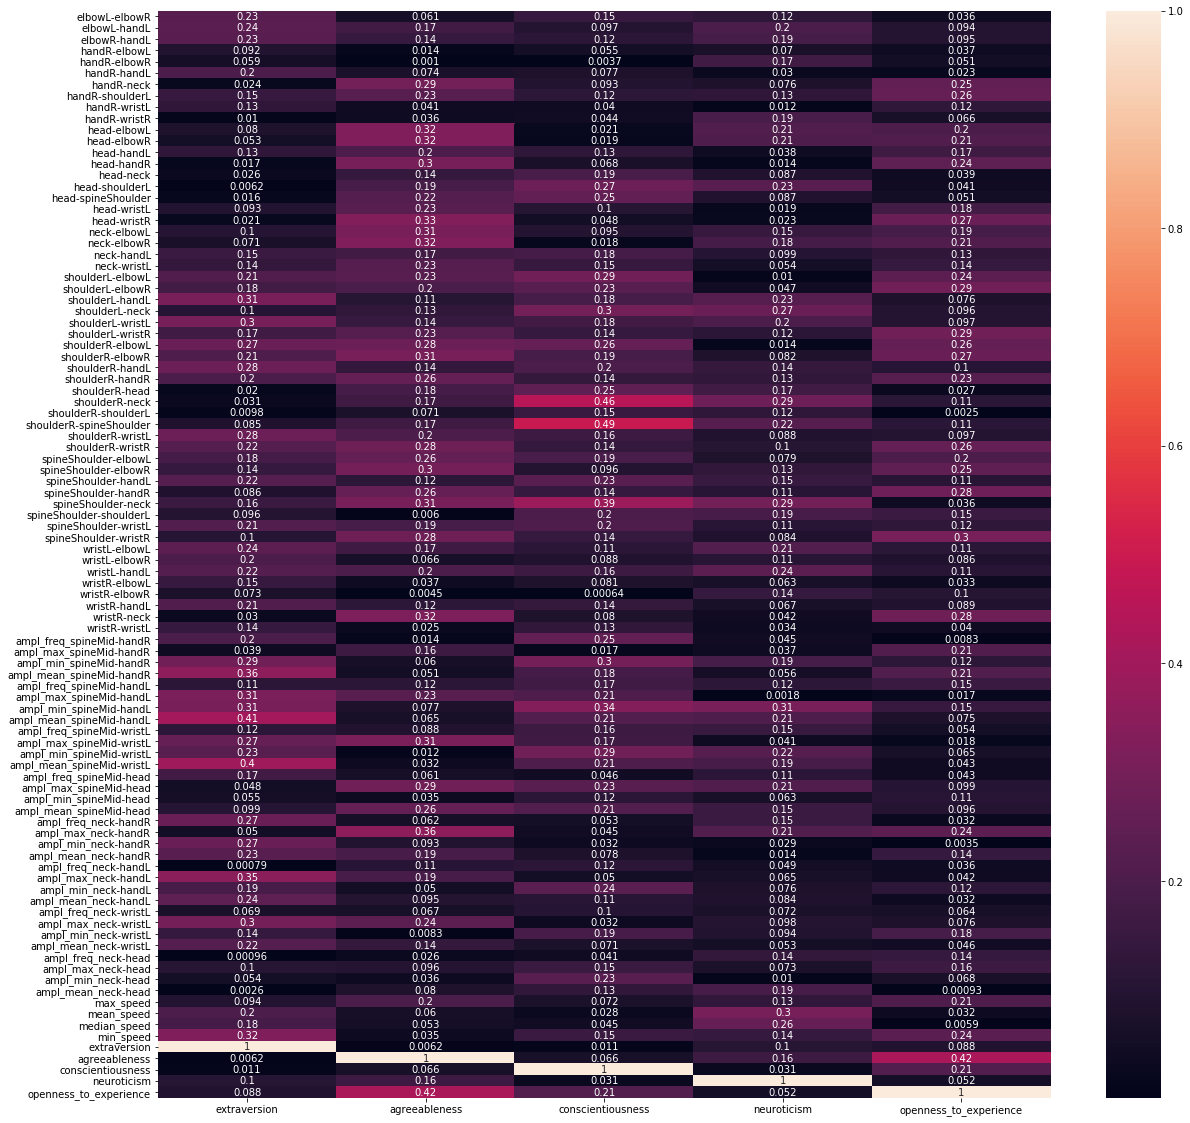

*****
task: 1
*****
extraversion                 1.000000
wristL-handL                 0.325517
ampl_freq_spineMid-handR     0.316916
ampl_freq_neck-handR         0.299474
ampl_freq_spineMid-wristL    0.283403
Name: extraversion, dtype: float64

agreeableness              1.000000
openness_to_experience     0.419457
ampl_freq_spineMid-head    0.241575
mean_speed                 0.238049
head-neck                  0.227653
Name: agreeableness, dtype: float64

conscientiousness       1.000000
shoulderR-head          0.300911
shoulderR-neck          0.295150
ampl_min_neck-wristL    0.255532
min_speed               0.250697
Name: conscientiousness, dtype: float64

neuroticism                1.000000
mean_speed                 0.331553
median_speed               0.296608
ampl_freq_spineMid-head    0.263957
neck-elbowR                0.233472
Name: neuroticism, dtype: float64

openness_to_experience    1.000000
agreeableness             0.419457
ampl_max_neck-head        0.412940
head-should

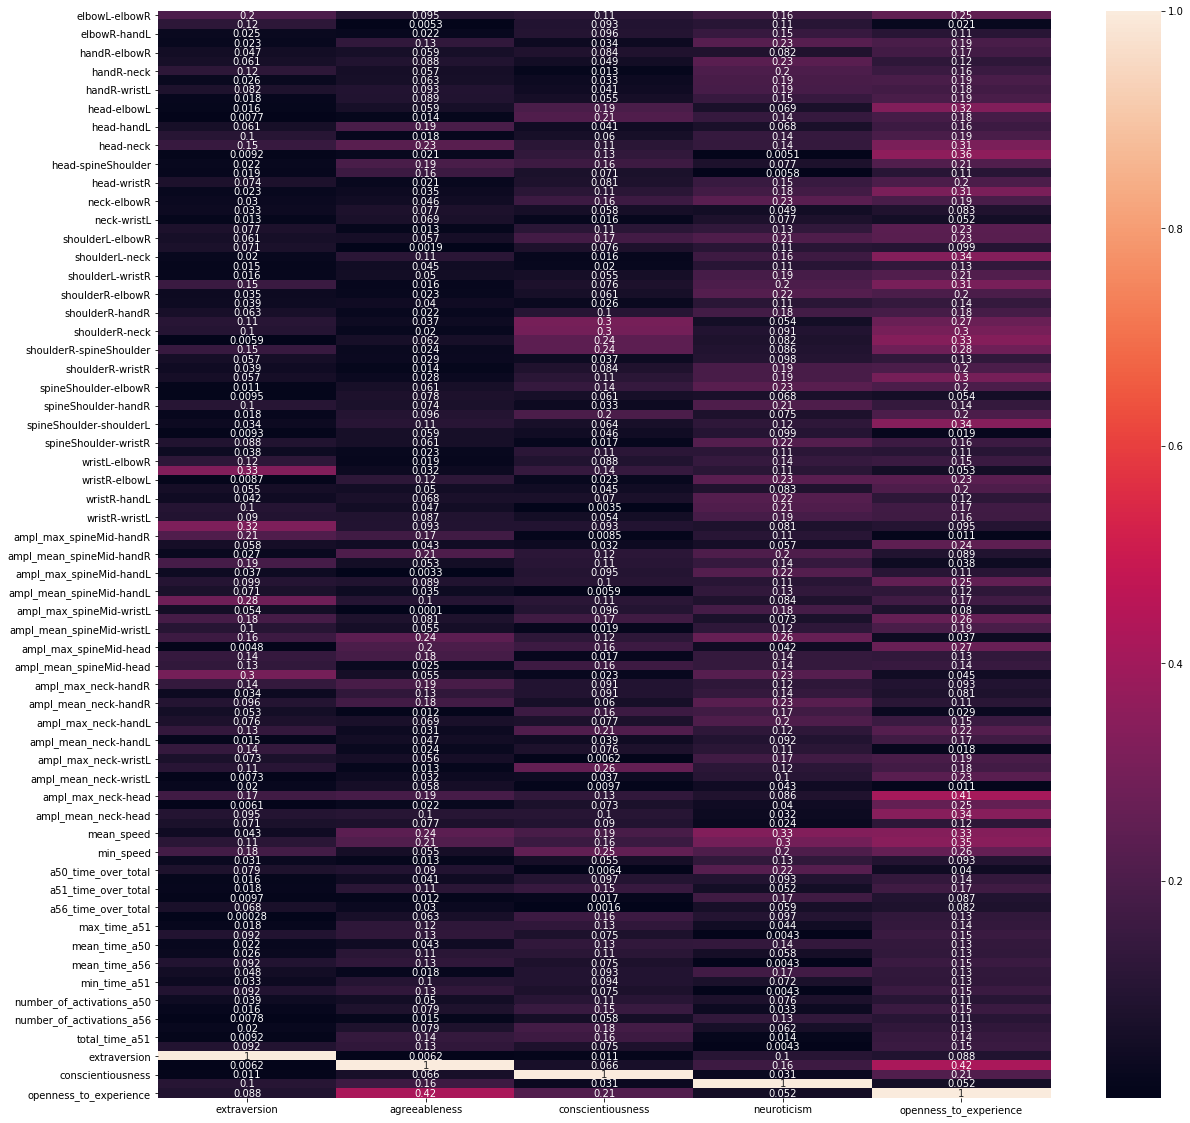

*****
task: 2
*****
extraversion               1.000000
ampl_freq_spineMid-head    0.305905
a56_time_over_total        0.264039
ampl_min_neck-handR        0.256357
max_time_a56               0.250771
Name: extraversion, dtype: float64

agreeableness             1.000000
openness_to_experience    0.419457
ampl_min_neck-head        0.289714
elbowL-handL              0.260021
elbowL-elbowR             0.240024
Name: agreeableness, dtype: float64

conscientiousness           1.000000
ampl_max_spineMid-wristL    0.386861
ampl_max_neck-wristL        0.352535
ampl_max_spineMid-handL     0.351317
wristR-handL                0.346770
Name: conscientiousness, dtype: float64

neuroticism                 1.000000
mean_speed                  0.452391
median_speed                0.405870
ampl_min_spineMid-head      0.236724
ampl_mean_spineMid-handR    0.218890
Name: neuroticism, dtype: float64

openness_to_experience      1.000000
ampl_min_neck-head          0.438875
agreeableness               0.41

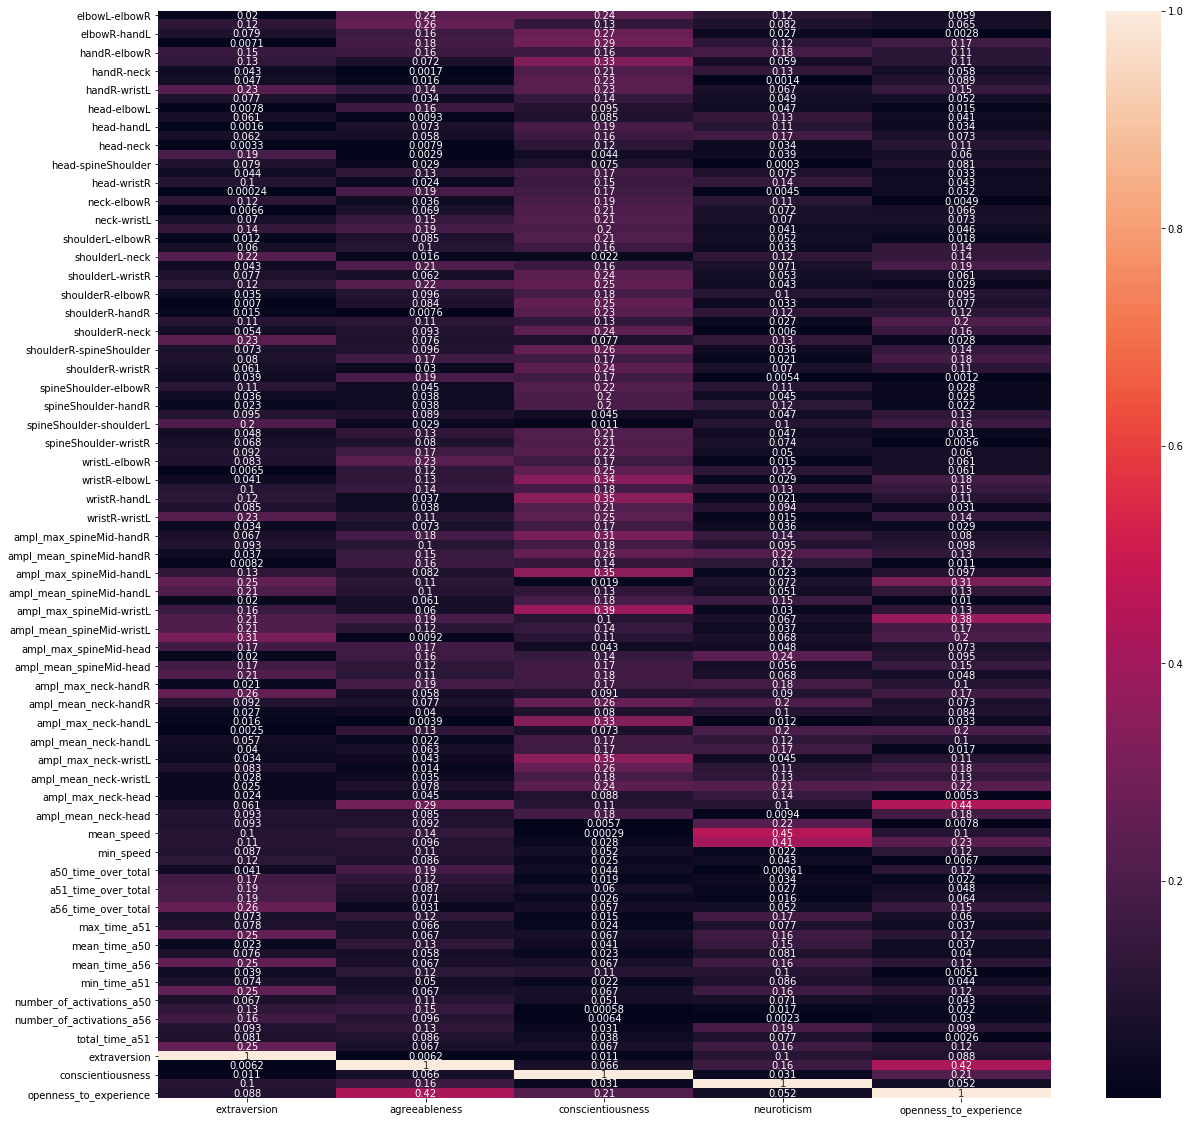

*****
task: 3
*****
extraversion              1.000000
ampl_min_spineMid-head    0.382622
max_speed                 0.292093
median_speed              0.289257
head-spineShoulder        0.257730
Name: extraversion, dtype: float64

agreeableness               1.000000
openness_to_experience      0.419457
ampl_freq_neck-handL        0.356565
ampl_freq_neck-wristL       0.286178
ampl_freq_spineMid-handL    0.268138
Name: agreeableness, dtype: float64

conscientiousness           1.000000
ampl_min_spineMid-wristL    0.318380
ampl_min_neck-handR         0.289637
max_time_a56                0.254288
mean_time_a56               0.254288
Name: conscientiousness, dtype: float64

neuroticism             1.000000
handR-wristR            0.514228
ampl_freq_neck-handR    0.349110
handR-elbowR            0.344346
total_time_a50          0.317365
Name: neuroticism, dtype: float64

openness_to_experience    1.000000
ampl_freq_neck-wristL     0.542635
agreeableness             0.419457
ampl_freq_neck-h

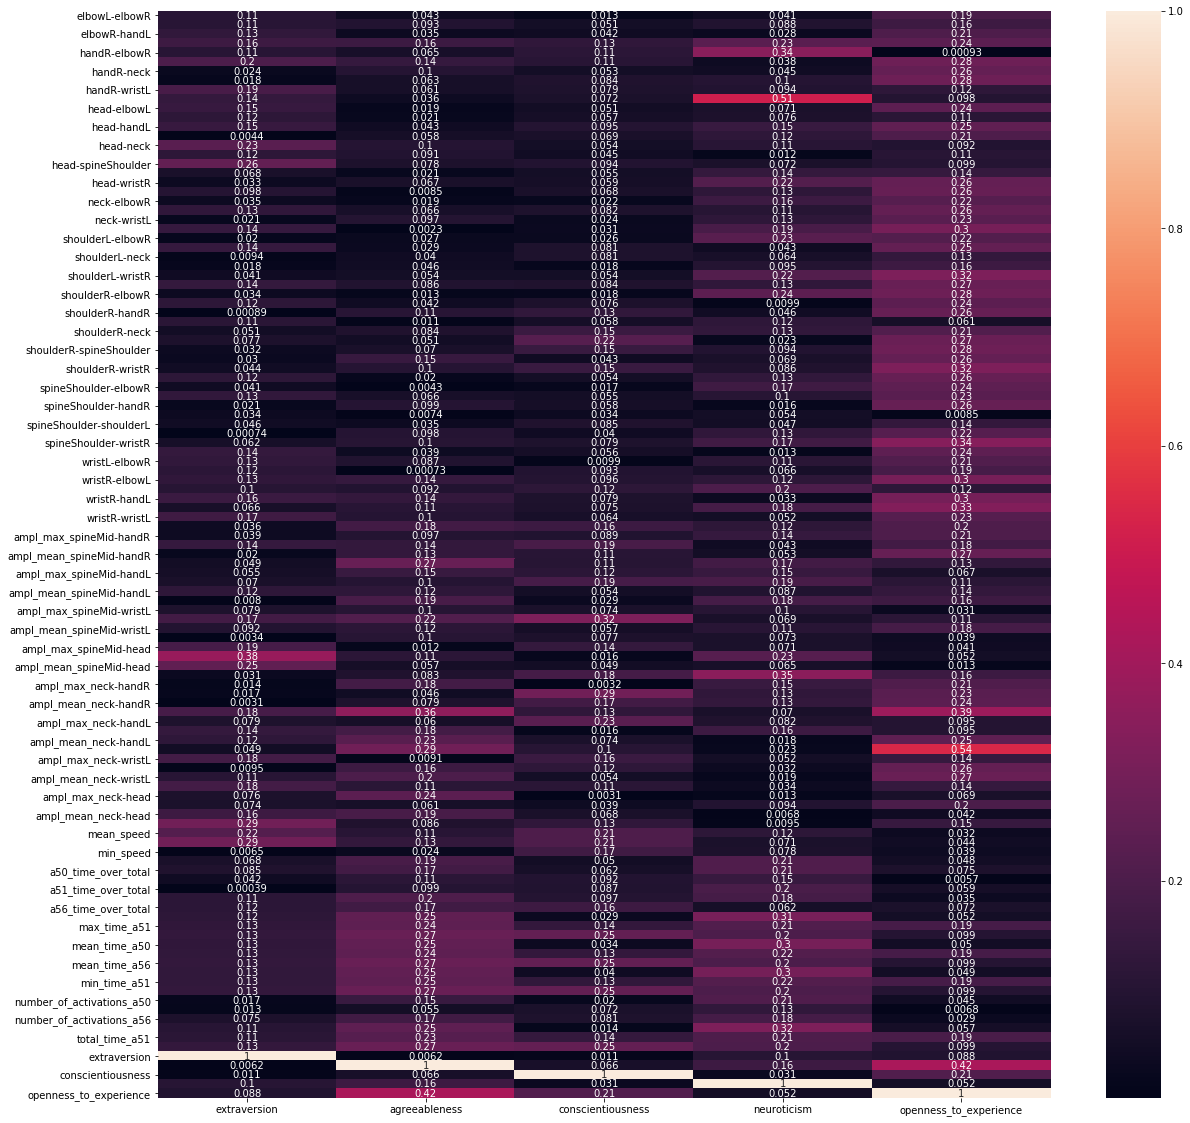

*****
task: 4
*****
extraversion               1.000000
handR-wristR               0.212744
max_speed                  0.205942
handR-wristL               0.198497
ampl_freq_spineMid-head    0.192811
Name: extraversion, dtype: float64

agreeableness             1.000000
openness_to_experience    0.419457
mean_speed                0.272732
min_speed                 0.269343
median_speed              0.222627
Name: agreeableness, dtype: float64

conscientiousness            1.000000
ampl_freq_spineMid-handL     0.397621
ampl_freq_spineMid-wristL    0.347970
ampl_freq_neck-handL         0.342556
shoulderR-handL              0.341253
Name: conscientiousness, dtype: float64

neuroticism           1.000000
mean_speed            0.468614
median_speed          0.374012
wristL-handL          0.288328
ampl_min_neck-head    0.251772
Name: neuroticism, dtype: float64

openness_to_experience    1.000000
agreeableness             0.419457
ampl_freq_neck-handL      0.337606
min_speed                 

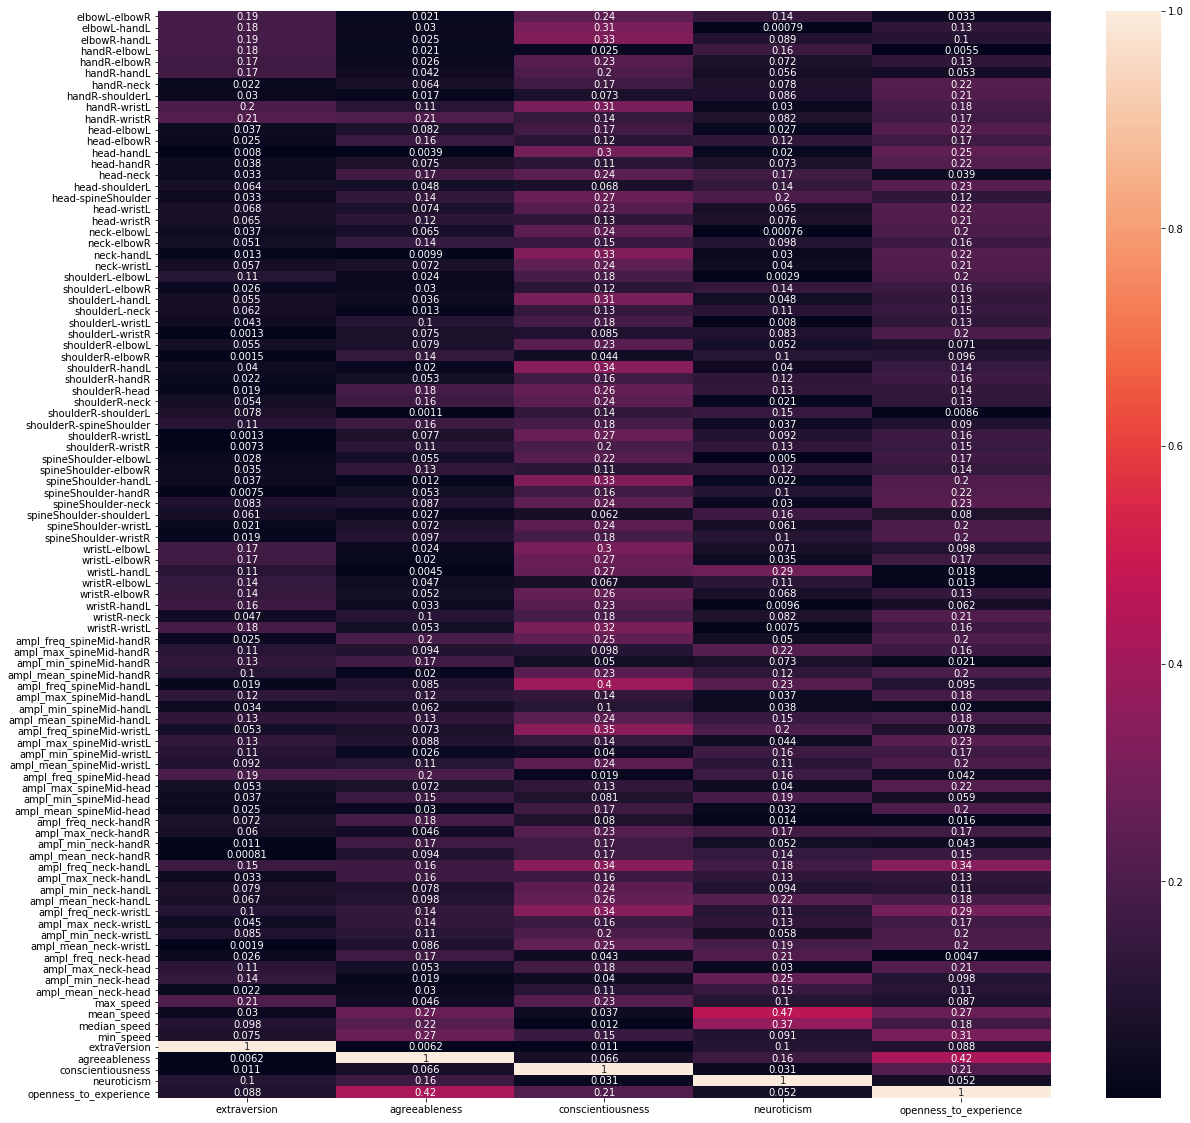

*****
task: 5
*****
extraversion          1.000000
shoulderR-head        0.320612
spineShoulder-neck    0.268516
median_speed          0.251861
head-spineShoulder    0.249134
Name: extraversion, dtype: float64

agreeableness              1.000000
openness_to_experience     0.419457
ampl_min_spineMid-head     0.414223
ampl_min_spineMid-handR    0.273061
max_speed                  0.272808
Name: agreeableness, dtype: float64

conscientiousness      1.000000
spineShoulder-neck     0.355349
head-shoulderL         0.354064
shoulderL-neck         0.342147
ampl_min_neck-handL    0.341759
Name: conscientiousness, dtype: float64

neuroticism             1.000000
head-elbowR             0.470342
neck-elbowR             0.445526
spineShoulder-elbowR    0.424549
shoulderL-elbowR        0.408847
Name: neuroticism, dtype: float64

openness_to_experience    1.000000
agreeableness             0.419457
ampl_mean_neck-head       0.356163
shoulderL-elbowR          0.299622
max_speed                 0.295

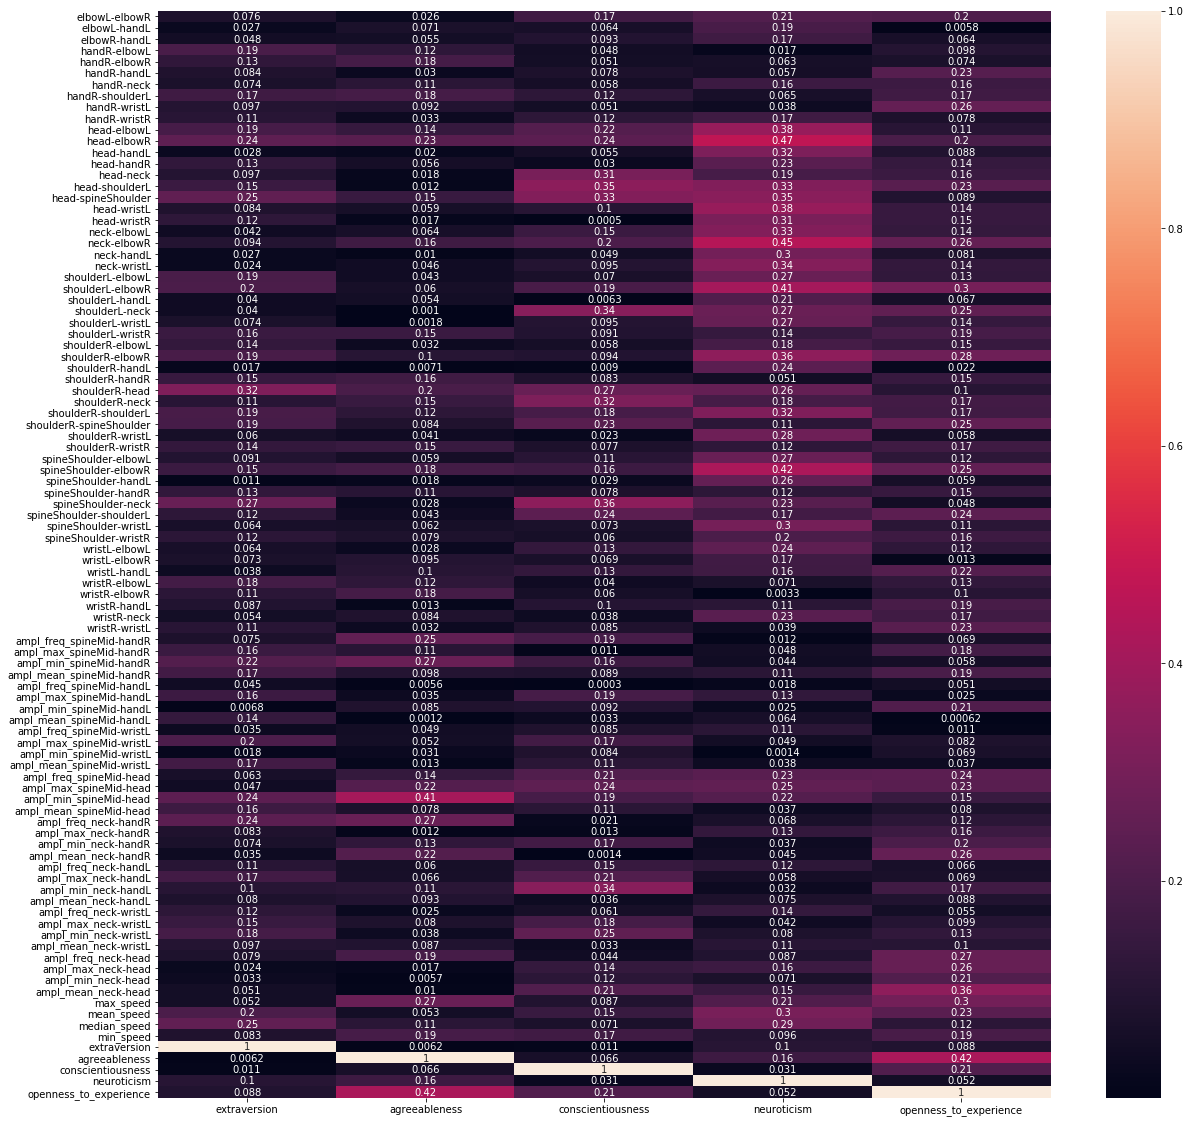

In [43]:
print '*'*5
print 'Absolute Value'
print '*'*5
print

fig=plt.figure(figsize=(20, 20))
for df in full_dfs_norm:
    
    var_features = list(df.var().index[(df.var()>0).values])
    print '*'*5
    print 'task:', df['task'][0]
    print '*'*5
    for b in big5:
        print np.abs(df[var_features].corr()[b]).nlargest(n=5)
        print
    #print len(var_features)
    sns.heatmap(np.abs(df[var_features].corr()[big5]), annot=True)
    plt.show()
    fig=plt.figure(figsize=(20, 20))

In [44]:
import pickle
#pickle.dump(full_dfs, open('../pickle_data/all_features_per_task.p', 'wb'))
#pickle.dump(full_dfs, open('../pickle_data/feature_dataframes/all_features_per_task_w_sensor.p', 'wb'))